# Analysis of Experiment Results



Index(['id', 'true_positive', 'false_positive', 'false_negative',
       'true_negative', 'sensitivity', 'specificity', 'prevalence', 'ppv',
       'npv', 'fpr', 'threat_score', 'accuracy', 'balanced_accuracy', 'F1',
       'MCC', 'informedness', 'markedness', 'fit_time_mean', 'fit_time_std',
       'score_time_mean', 'score_time_std', 'test_accuracy_mean',
       'test_accuracy_std', 'train_accuracy_mean', 'train_accuracy_std',
       'test_recall_mean', 'test_recall_std', 'train_recall_mean',
       'train_recall_std', 'test_precision_mean', 'test_precision_std',
       'train_precision_mean', 'train_precision_std', 'test_roc_auc_mean',
       'test_roc_auc_std', 'train_roc_auc_mean', 'train_roc_auc_std',
       'test_f1_mean', 'test_f1_std', 'train_f1_mean', 'train_f1_std'],
      dtype='object')


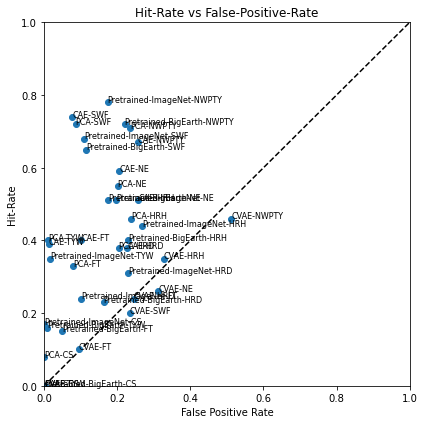

0

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, csv

res = pd.read_csv('../workspace/exp_results_default.csv')
print(res.columns)


# Plot
def plot_roc_curve(metrics):
    plt.figure(figsize=(6,6))
    plt.title('Hit-Rate vs False-Positive-Rate')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(metrics['fpr'],metrics['sensitivity'], 'o')
    plt.xlim((0, 1.))
    plt.ylim((0, 1.))
    plt.xlabel('False Positive Rate')
    plt.ylabel('Hit-Rate')
    # Add IDs
    for i in range(metrics.shape[0]):
        tmp = metrics.iloc[i,:]
        plt.annotate(tmp['id'], (tmp['fpr'], tmp['sensitivity']), size=8)
    # Wrap up
    plt.tight_layout()
    plt.show()
    return(0)

plot_roc_curve(res)

In [2]:
# Meta Analysis
# Plot
def analyze_metrics(metrics):
    # Separate feature and event
    ids = metrics['id']
    fvs = [i.split('-')[0] for i in ids]
    evs = [i.split('-')[-1] for i in ids]
    metrics['feature'] = fvs
    metrics['event'] = evs
    # Compare events in total
    subset = metrics.loc[:,['event','sensitivity','fpr','threat_score']]
    results = subset.groupby(by='event').max()
    # Loop through events
    events = list(set(evs))
    for e in events:
        print(e)
        tmp = metrics.loc[metrics['event']==e,
                          ['id','sensitivity','fpr','threat_score']].sort_values('sensitivity', ascending=False)
        print(tmp)
    return(results)

analyze_metrics(res)

NWPTY
                           id  sensitivity     fpr  threat_score
34  Pretrained-ImageNet-NWPTY         0.78  0.1739        0.6529
26  Pretrained-BigEarth-NWPTY         0.72  0.2200        0.5794
2                   PCA-NWPTY         0.71  0.2358        0.5634
10                  CAE-NWPTY         0.67  0.2556        0.5255
18                 CVAE-NWPTY         0.46  0.5125        0.2959
FT
                        id  sensitivity     fpr  threat_score
11                  CAE-FT         0.40  0.1017        0.2652
3                   PCA-FT         0.33  0.0794        0.2358
35  Pretrained-ImageNet-FT         0.24  0.1001        0.1583
27  Pretrained-BigEarth-FT         0.15  0.0488        0.1242
19                 CVAE-FT         0.10  0.0951        0.0678
HRD
                         id  sensitivity     fpr  threat_score
6                   PCA-HRD         0.38  0.2035        0.2492
14                  CAE-HRD         0.38  0.2267        0.2400
38  Pretrained-ImageNet-HRD         

,sensitivity,fpr,threat_score
event,,,
CS,0.17,0.0021,0.1538
FT,0.40,0.1017,0.2652
HRD,0.38,0.2452,0.2492
HRH,0.51,0.3269,0.3457
NE,0.59,0.3115,0.4104
NWPTY,0.78,0.5125,0.6529
SWF,0.74,0.2341,0.6118
TYW,0.40,0.0152,0.3247


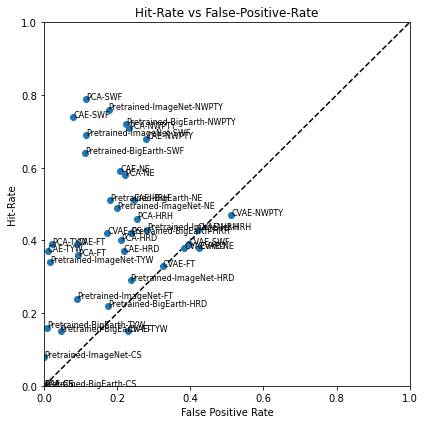

NWPTY
                           id  sensitivity     fpr  threat_score
34  Pretrained-ImageNet-NWPTY         0.76  0.1765        0.6391
26  Pretrained-BigEarth-NWPTY         0.72  0.2240        0.5786
2                   PCA-NWPTY         0.71  0.2332        0.5635
10                  CAE-NWPTY         0.68  0.2793        0.5172
18                 CVAE-NWPTY         0.47  0.5125        0.3006
FT
                        id  sensitivity     fpr  threat_score
11                  CAE-FT         0.39  0.0902        0.2701
3                   PCA-FT         0.36  0.0935        0.2472
19                 CVAE-FT         0.33  0.3242        0.1236
35  Pretrained-ImageNet-FT         0.24  0.0902        0.1638
27  Pretrained-BigEarth-FT         0.15  0.0447        0.1229
HRD
                         id  sensitivity     fpr  threat_score
6                   PCA-HRD         0.40  0.2112        0.2650
22                 CVAE-HRD         0.38  0.3837        0.1946
14                  CAE-HRD         

,sensitivity,fpr,threat_score
event,,,
CS,0.42,0.1727,0.0833
FT,0.39,0.3242,0.2701
HRD,0.40,0.3837,0.2650
HRH,0.51,0.4202,0.3535
NE,0.59,0.4239,0.4086
NWPTY,0.76,0.5125,0.6391
SWF,0.79,0.3953,0.6101
TYW,0.39,0.2287,0.3067


In [3]:
res2 = pd.read_csv('../workspace/exp_results_no_balanced.csv')
plot_roc_curve(res2)
analyze_metrics(res2)

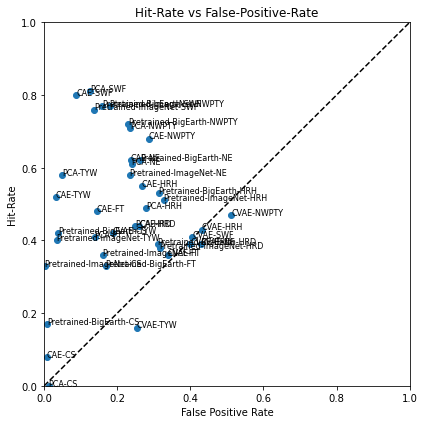

NWPTY
                           id  sensitivity     fpr  threat_score
34  Pretrained-ImageNet-NWPTY         0.77  0.1792        0.6400
26  Pretrained-BigEarth-NWPTY         0.72  0.2306        0.5764
2                   PCA-NWPTY         0.71  0.2345        0.5663
10                  CAE-NWPTY         0.68  0.2859        0.5177
18                 CVAE-NWPTY         0.47  0.5125        0.3015
FT
                        id  sensitivity     fpr  threat_score
11                  CAE-FT         0.48  0.1439        0.2785
3                   PCA-FT         0.41  0.1381        0.2438
19                 CVAE-FT         0.36  0.3383        0.1343
35  Pretrained-ImageNet-FT         0.36  0.1596        0.2014
27  Pretrained-BigEarth-FT         0.33  0.1679        0.1810
HRD
                         id  sensitivity     fpr  threat_score
6                   PCA-HRD         0.44  0.2490        0.2734
14                  CAE-HRD         0.44  0.2597        0.2705
22                 CVAE-HRD         

,sensitivity,fpr,threat_score
event,,,
CS,0.42,0.1873,0.2857
FT,0.48,0.3383,0.2785
HRD,0.44,0.4002,0.2734
HRH,0.55,0.4309,0.3691
NE,0.62,0.4290,0.4180
NWPTY,0.77,0.5125,0.6400
SWF,0.81,0.4047,0.6474
TYW,0.58,0.2532,0.3019


In [4]:
res_dual = pd.read_csv('../workspace/exp_results_with_dual.csv')
plot_roc_curve(res_dual)
analyze_metrics(res_dual)

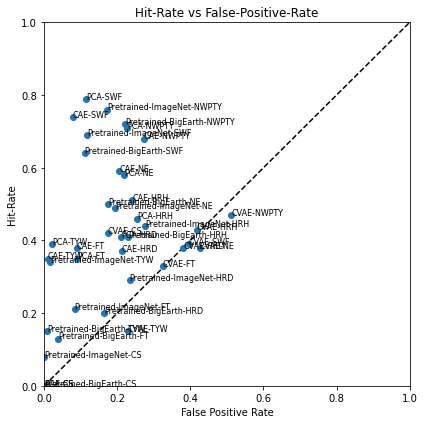

NWPTY
                           id  sensitivity     fpr  threat_score
34  Pretrained-ImageNet-NWPTY         0.76  0.1713        0.6435
26  Pretrained-BigEarth-NWPTY         0.72  0.2213        0.5776
2                   PCA-NWPTY         0.71  0.2266        0.5656
10                  CAE-NWPTY         0.68  0.2727        0.5223
18                 CVAE-NWPTY         0.47  0.5125        0.3015
FT
                        id  sensitivity     fpr  threat_score
11                  CAE-FT         0.38  0.0885        0.2601
3                   PCA-FT         0.35  0.0902        0.2414
19                 CVAE-FT         0.33  0.3251        0.1234
35  Pretrained-ImageNet-FT         0.21  0.0835        0.1500
27  Pretrained-BigEarth-FT         0.13  0.0389        0.1119
HRD
                         id  sensitivity     fpr  threat_score
6                   PCA-HRD         0.41  0.2103        0.2670
22                 CVAE-HRD         0.38  0.3808        0.1953
14                  CAE-HRD         

,sensitivity,fpr,threat_score
event,,,
CS,0.42,0.1741,0.0833
FT,0.38,0.3251,0.2601
HRD,0.41,0.3808,0.2670
HRH,0.51,0.4180,0.3554
NE,0.59,0.4259,0.4104
NWPTY,0.76,0.5125,0.6435
SWF,0.79,0.3953,0.6113
TYW,0.39,0.2280,0.2933


In [5]:
res_c08 = pd.read_csv('../workspace/exp_results_C08.csv')
plot_roc_curve(res_c08)
analyze_metrics(res_c08)

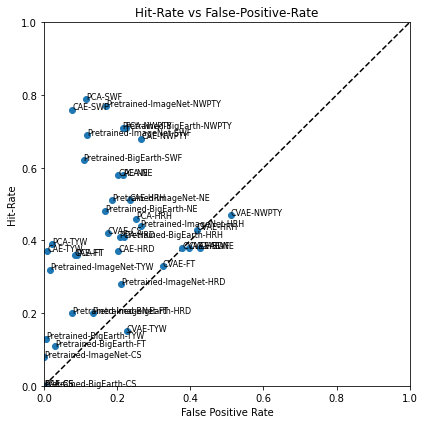

NWPTY
                           id  sensitivity     fpr  threat_score
34  Pretrained-ImageNet-NWPTY         0.77  0.1686        0.6463
2                   PCA-NWPTY         0.71  0.2227        0.5676
26  Pretrained-BigEarth-NWPTY         0.71  0.2148        0.5775
10                  CAE-NWPTY         0.68  0.2661        0.5264
18                 CVAE-NWPTY         0.47  0.5112        0.3036
FT
                        id  sensitivity     fpr  threat_score
3                   PCA-FT         0.36  0.0885        0.2486
11                  CAE-FT         0.36  0.0835        0.2529
19                 CVAE-FT         0.33  0.3251        0.1234
35  Pretrained-ImageNet-FT         0.20  0.0761        0.1450
27  Pretrained-BigEarth-FT         0.11  0.0289        0.0985
HRD
                         id  sensitivity     fpr  threat_score
6                   PCA-HRD         0.41  0.2064        0.2703
22                 CVAE-HRD         0.38  0.3779        0.1948
14                  CAE-HRD         

,sensitivity,fpr,threat_score
event,,,
CS,0.42,0.1741,0.0833
FT,0.36,0.3251,0.2529
HRD,0.41,0.3779,0.2703
HRH,0.51,0.4180,0.3561
NE,0.58,0.4259,0.4093
NWPTY,0.77,0.5112,0.6463
SWF,0.79,0.3962,0.6308
TYW,0.39,0.2266,0.3108


In [6]:
res_c05 = pd.read_csv('../workspace/exp_results_C05.csv')
plot_roc_curve(res_c05)
analyze_metrics(res_c05)